Python 3.11.2에 연결됨

In [1]:
filePath = 'C:/Users/준식/Desktop/ㅈㅍ/9-19/GlossySnake/src/tools/data/schubert.md'
with  open(filePath,'r',encoding='UTF8') as f: # 본인 경로 설정 필요
    lines = f.read()

# 문단을 '#' 기호를 기준으로 분할하고 각 문단을 처리
paragraphs = lines.strip().split('\n#')
texts_a = [{"original_text": para.strip()} for para in paragraphs if para.strip()]

if texts_a and texts_a[0]['original_text'].startswith('# '):
    texts_a[0]['original_text'] = texts_a[0]['original_text'][2:]  # '# ' 제거

for text in texts_a:
    print(text)

{'original_text': 'Gute Nacht.\n\nFremd bin ich eingezogen,\nFremd zieh’ ich wieder aus.\nDer Mai war mir gewogen\nMit manchem Blumenstrauß.\nDas Mädchen sprach von Liebe,\nDie Mutter gar von Eh’ —\nNun ist die Welt so trübe,\nDer Weg gehüllt in Schnee.\n\nIch kann zu meiner Reisen\nNicht wählen mit der Zeit:\nMuß selbst den Weg mir weisen\nIn dieser Dunkelheit.\nEs zieht ein Mondenschatten\nAls mein Gefährte mit,\nUnd auf den weißen Matten\nSuch’ ich des Wildes Tritt.\n\nWas soll ich länger weilen,\nBis man mich trieb’ hinaus?\nLaß irre Hunde heulen\nVor ihres Herren Haus!\nDie Liebe liebt das Wandern, —\nGott hat sie so gemacht —\nVon Einem zu dem Andern —\nFein Liebchen, gute Nacht!\n\nWill dich im Traum nicht stören,\nWär’ Schad’ um deine Ruh’,\nSollst meinen Tritt nicht hören —\nSacht, sacht die Thüre zu!\nIch schreibe nur im Gehen\nAn’s Thor noch gute Nacht,\nDamit du mögest sehen,\nIch hab’ an dich gedacht.'}
{'original_text': 'Die Wetterfahne.\n\nDer Wind spielt mit der Wetterf

In [2]:
texts = [
    {'original_text': 'Die Post.\n\nVon der Straße her ein Posthorn klingt.\nWas hat es, daß es so hoch aufspringt,\nMein Herz?\n\nDie Post bringt keinen Brief für dich:\nWas drängst du denn so wunderlich,\nMein Herz?\n\nNun ja, die Post kömmt aus der Stadt,\nWo ich ein liebes Liebchen hatt’,\nMein Herz!\n\nWillst wohl einmal hinübersehn,\nUnd fragen, wie es dort mag gehn,\nMein Herz?'},
    {'original_text': 'Wasserfluth.\n\nManche Thrän’ aus meinen Augen\nIst gefallen in den Schnee;\nSeine kalten Flocken saugen\nDurstig ein das heiße Weh.\n\nWann die Gräser sprossen wollen,\nWeht daher ein lauer Wind,\nUnd das Eis zerspringt in Schollen,\nUnd der weiche Schnee zerrinnt.\n\nSchnee, du weißt von meinem Sehnen:\nSag mir, wohin geht dein Lauf?\nFolge nach nur meinen Thränen,\nNimmt dich bald das Bächlein auf.\n\nWirst mit ihm die Stadt durchziehen,\nMuntre Straßen ein und aus:\nFühlst du meine Thränen glühen,\nDa ist meiner Liebsten Haus.'},
]

In [3]:
import requests
import json
import math
import time

HOST = "http://127.0.0.1:56123"

REGISTRATION_URL = f"{HOST}/api/v4/rest-auth/registration/"
LOGIN_URL = f"{HOST}/api/v4/rest-auth/login/"
LOGOUT_URL = f"{HOST}/api/v4/rest-auth/logout/"
UPLOAD_URL = f"{HOST}/api/v4/upload"
DIVIDE_URL = f"{HOST}/api/v4/parser/divide"
PARSE_URL = f"{HOST}/api/v4/parser/parse"
ANNOTATE_URL = f"{HOST}/api/v4/annotator/annotate"
CORPUSES_URL = f"{HOST}/api/v4/corpuses/"

url = "http://127.0.0.1:56123"


In [4]:
join_membership = {
    "username": "abc111",
    "email": "abcdefghi12@naver.com",
    "password1": "testaaaaaa!",
    "password2": "testaaaaaa!"
}

join_membership_response = requests.post(REGISTRATION_URL, data=join_membership)

login = {
    "username": "abc111",
    "email": "abcdefghi12@naver.com",
    "password": "testaaaaaa!"
}

login_response= requests.post(LOGIN_URL, json=login)
login_data = login_response.json()
token = login_data.get('key')

login_key = {
    'Authorization': f'Token {token}'
}


In [5]:
time_list = []
annotate_list = []
unit_time_list = []
text_index_list = []
annotators = ["chatgpt_ft0", "chatgpt_gpt-3.5-turbo-untrained_0","chatgpt_gpt-3.5-turbo-pretrained_0","chatgpt_gpt-4o-mini-untrained_0","chatgpt_gpt-4o-mini-pretrained_0"]

for annotator_name in annotators:
    for i, text in enumerate(texts):
        upload_response = requests.post(UPLOAD_URL, json=text, headers=login_key)
        corpus_id = upload_response.json().get('corpus_id')

        divide_data = {
            "corpus_id": corpus_id,
            "divide_options": json.dumps({"p_delims": ["\n"]})
        }
        divide_response = requests.post(DIVIDE_URL, json=divide_data, headers=login_key)

        parse_data = {
            "corpus_id": corpus_id,
            "parse_options": json.dumps({"t_delims": " \t\n\r\u000b\f"})
        }
        parse_response = requests.post(PARSE_URL, json=parse_data, headers=login_key)

        start = time.time()

        annotate_data = {
            "corpus_id": corpus_id,
            "annotate_options": json.dumps({
                "lang_from": "German",
                "lang_to": "English",
                "annotator_name": annotator_name
            })
        }
        annotate_response = requests.post(ANNOTATE_URL, json=annotate_data, headers=login_key)
        
        end = time.time()
        print(annotator_name)
        print(f"{end - start:.5f} sec")
        unit_time_list.append((annotator_name,end - start))
        time_list.append(end - start)
        annotate_list.append(annotator_name)
        text_index_list.append(i)



chatgpt_ft0
23.04945 sec
chatgpt_ft0
32.25161 sec
chatgpt_gpt-3.5-turbo-untrained_0
26.36190 sec
chatgpt_gpt-3.5-turbo-untrained_0
34.37301 sec
chatgpt_gpt-3.5-turbo-pretrained_0
25.89633 sec
chatgpt_gpt-3.5-turbo-pretrained_0
38.00795 sec
chatgpt_gpt-4o-mini-untrained_0
31.75179 sec
chatgpt_gpt-4o-mini-untrained_0
40.79091 sec
chatgpt_gpt-4o-mini-pretrained_0
25.77019 sec
chatgpt_gpt-4o-mini-pretrained_0
39.73283 sec


In [6]:
corpuses_respons = requests.get(CORPUSES_URL, headers=login_key)
corpuse_history = corpuses_respons.json()
rate_list = []
texts_len = len(texts) 
num = int(corpuse_history[-1].get('corpus_id'))  # 마지막 코퍼스의 ID 가져오기
first = num - (texts_len*len(annotators))
number2 = 0

for number in range(first, num):
    Unknown_count = 0
    token_sum = 0
    for corpus_record in corpuse_history[number]['corpuses_history']:
        for paragraph in corpus_record['paragraphs']:
            if paragraph['pstate'] == "ANNOTATED":
                for token in paragraph.get('tokens', []):
                    if not token['is_delimiter']:
                        token_sum += 1
                        if token.get('gloss') == "!UNKNOWN" or token.get('gloss') is None:
                            Unknown_count += 1
                            print(token)

    if token_sum > 0:
        Return_rate = ((token_sum - Unknown_count) / token_sum) * 100
        rate_list.append(Return_rate)
        print(number2, "annotator_name:", annotate_list[number2], "time:", round(float(time_list[number2]), 2), ", return_rate:", round(Return_rate, 2))
        
    else:
        print(number, "time:", round(float(time_list[number2]), 2), ", No tokens to calculate return rate")
        
    number2 += 1


0 annotator_name: chatgpt_ft0 time: 23.05 , return_rate: 100.0
1 annotator_name: chatgpt_ft0 time: 32.25 , return_rate: 100.0
2 annotator_name: chatgpt_gpt-3.5-turbo-untrained_0 time: 26.36 , return_rate: 100.0
3 annotator_name: chatgpt_gpt-3.5-turbo-untrained_0 time: 34.37 , return_rate: 100.0
4 annotator_name: chatgpt_gpt-3.5-turbo-pretrained_0 time: 25.9 , return_rate: 100.0
5 annotator_name: chatgpt_gpt-3.5-turbo-pretrained_0 time: 38.01 , return_rate: 100.0
6 annotator_name: chatgpt_gpt-4o-mini-untrained_0 time: 31.75 , return_rate: 100.0
7 annotator_name: chatgpt_gpt-4o-mini-untrained_0 time: 40.79 , return_rate: 100.0
8 annotator_name: chatgpt_gpt-4o-mini-pretrained_0 time: 25.77 , return_rate: 100.0
9 annotator_name: chatgpt_gpt-4o-mini-pretrained_0 time: 39.73 , return_rate: 100.0


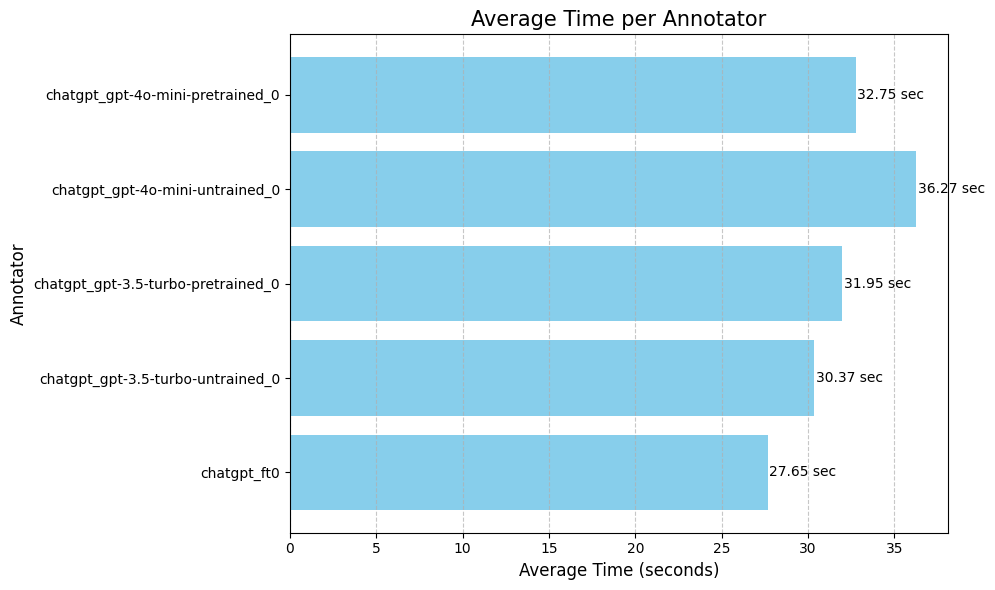

In [7]:
import matplotlib.pyplot as plt
import numpy as np

annotator_dict = {}
for annotator, time in zip(annotate_list, time_list):
    if annotator in annotator_dict:
        annotator_dict[annotator].append(time)
    else:
        annotator_dict[annotator] = [time]


annotator_avg = {k: np.mean(v) for k, v in annotator_dict.items()}

names = list(annotator_avg.keys())
avg_times = list(annotator_avg.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(names, avg_times, color='skyblue')

# 각 막대 옆에 값 표시
for bar, avg_time in zip(bars, avg_times):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{avg_time:.2f} sec', va='center')

plt.xlabel('Average Time (seconds)', fontsize=12)
plt.ylabel('Annotator', fontsize=12)
plt.title('Average Time per Annotator', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # X축에 점선 그리드 추가

plt.tight_layout()  
plt.show()

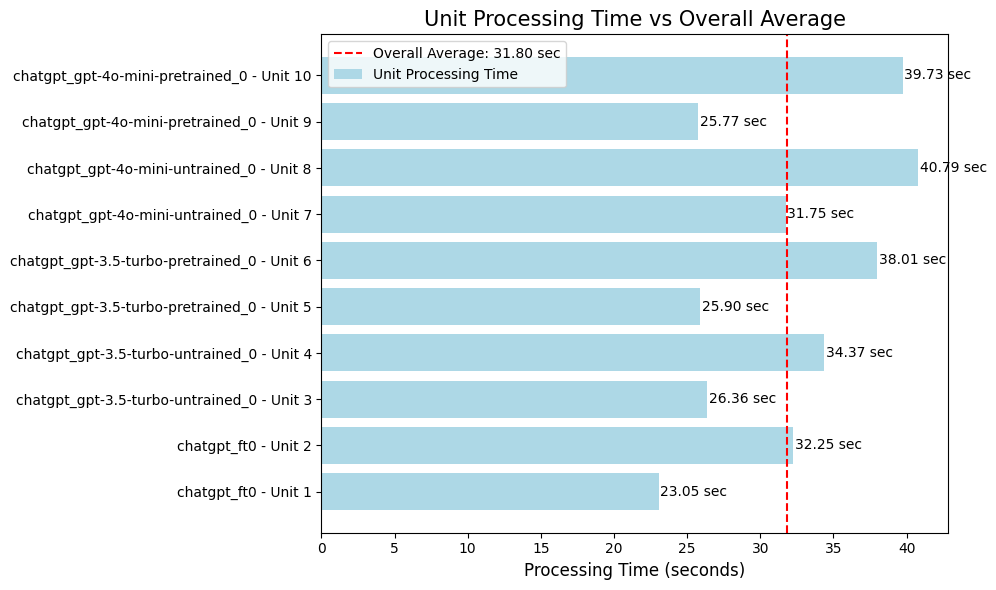

전체 평균보다 시간이 더 걸린 유닛의 개수: 5
전체 평균보다 시간이 덜 걸린 유닛의 개수: 5


In [8]:
total_avg_time = np.mean(time_list)

#Annotator별 유닛 성능과 전체 평균 비교
annotator_avg_times = {}
for annotator, time in unit_time_list:
    if annotator in annotator_avg_times:
        annotator_avg_times[annotator].append(time)
    else:
        annotator_avg_times[annotator] = [time]

annotator_avg = {annotator: np.mean(times) for annotator, times in annotator_avg_times.items()}


plt.figure(figsize=(10, 6))

# 유닛별 처리 시간 시각화
unit_times = [unit_time for _, unit_time in unit_time_list]
unit_labels = [f"{annotator} - Unit {i+1}" for i, (annotator, _) in enumerate(unit_time_list)]
y_pos = np.arange(len(unit_times))

plt.barh(y_pos, unit_times, color='lightblue', label='Unit Processing Time')

# 전체 평균 선 그리기
plt.axvline(total_avg_time, color='red', linestyle='--', label=f'Overall Average: {total_avg_time:.2f} sec')

# 각 유닛별 처리 시간 옆에 값 표시
for i, unit_time in enumerate(unit_times):
    plt.text(unit_time + 0.1, i, f'{unit_time:.2f} sec', va='center')

plt.yticks(y_pos, unit_labels)
plt.xlabel('Processing Time (seconds)', fontsize=12)
plt.title('Unit Processing Time vs Overall Average', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()

above_average = [unit_time for unit_time in unit_times if unit_time > total_avg_time]
below_average = [unit_time for unit_time in unit_times if unit_time <= total_avg_time]

print(f"전체 평균보다 시간이 더 걸린 유닛의 개수: {len(above_average)}")
print(f"전체 평균보다 시간이 덜 걸린 유닛의 개수: {len(below_average)}")

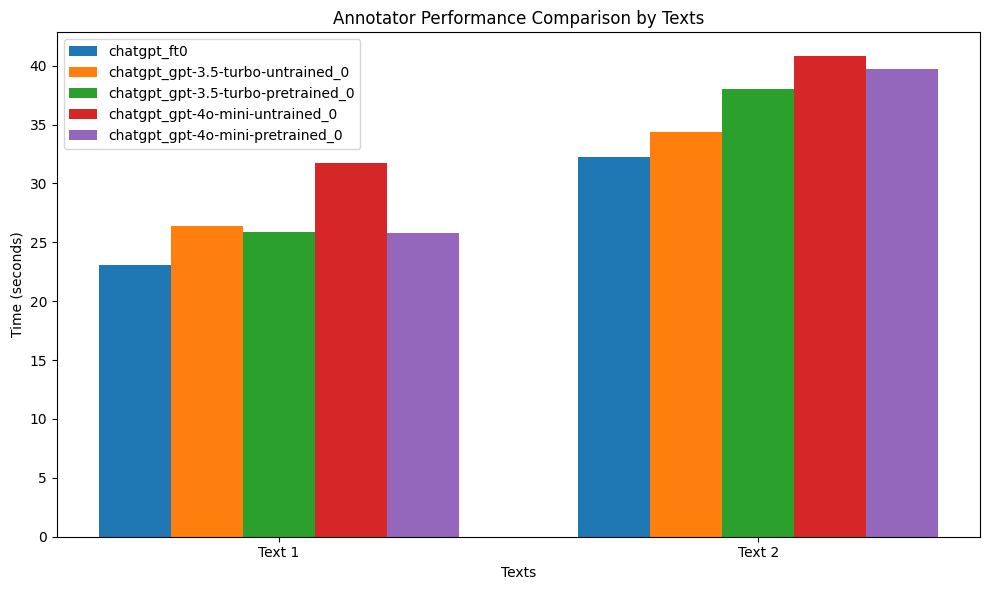

In [12]:
# Visualization: Annotator별 성능 비교
plt.figure(figsize=(10, 6))
x = np.arange(len(texts))

# 텍스트별로 Annotator 성능 시각화
for j, annotator_name in enumerate(annotators):
    y = [time_list[i] for i in range(len(time_list)) if annotate_list[i] == annotator_name]
    plt.bar(x + j * 0.15, y, width=0.15, label=annotator_name)

plt.xlabel('Texts')
plt.ylabel('Time (seconds)')
plt.title('Annotator Performance Comparison by Texts')
plt.xticks(x + 0.3, [f'Text {i+1}' for i in range(len(texts))])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

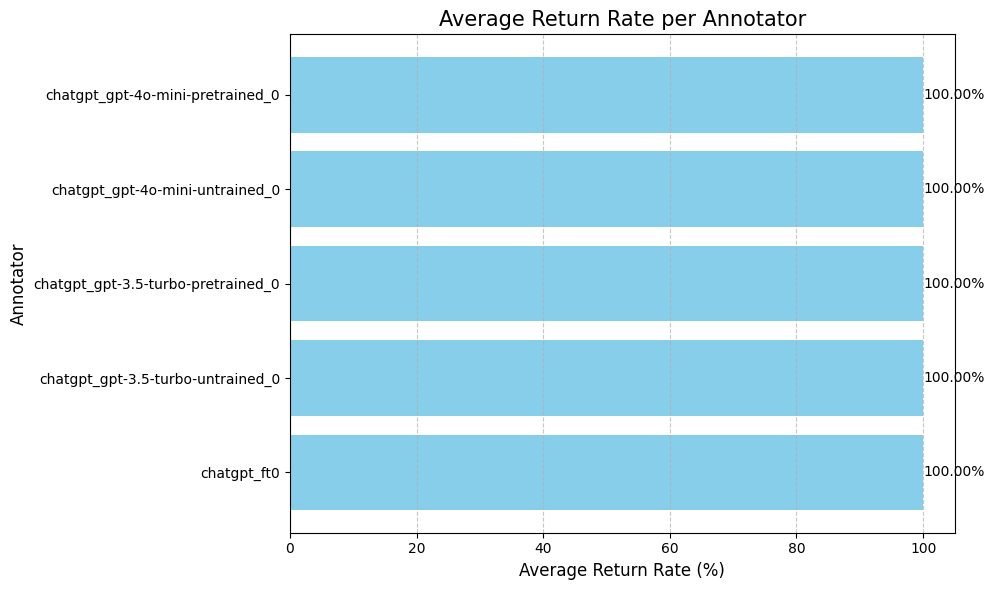

In [9]:
annotator_dict = {}
for annotator, rate in zip(annotate_list, rate_list):
    if annotator in annotator_dict:
        annotator_dict[annotator].append(rate)
    else:
        annotator_dict[annotator] = [rate]

annotator_avg = {k: np.mean(v) for k, v in annotator_dict.items()}

names = list(annotator_avg.keys())
avg_rates = list(annotator_avg.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(names, avg_rates, color='skyblue')

# 각 막대 옆에 평균 Return Rate 값 표시
for bar, avg_rate in zip(bars, avg_rates):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{avg_rate:.2f}%', va='center')

plt.xlabel('Average Return Rate (%)', fontsize=12)
plt.ylabel('Annotator', fontsize=12)
plt.title('Average Return Rate per Annotator', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # X축에 점선 그리드 추가

plt.tight_layout()  
plt.show()

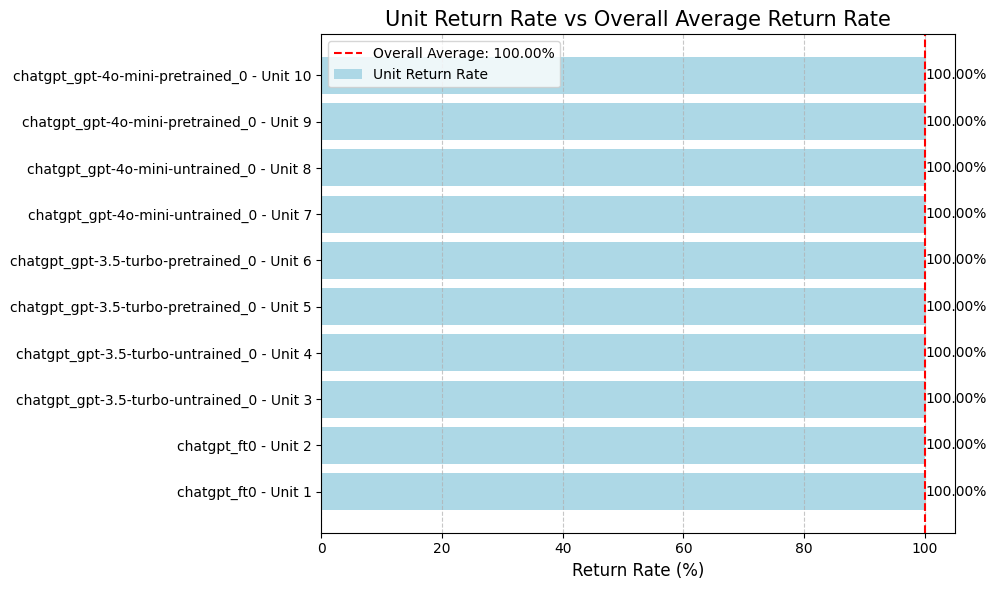

In [10]:
annotator_dict = {}
for annotator, rate in zip(annotate_list, rate_list):
    if annotator in annotator_dict:
        annotator_dict[annotator].append(rate)
    else:
        annotator_dict[annotator] = [rate]


annotator_avg_rates = {k: np.mean(v) for k, v in annotator_dict.items()}

# 유닛별 Return Rate 및 평균 Return Rate 시각화
unit_return_rates = []  
unit_labels = []        

for i, (annotator, rate) in enumerate(zip(annotate_list, rate_list)):
    unit_return_rates.append(rate)
    unit_labels.append(f"{annotator} - Unit {i + 1}")


overall_avg_rate = np.mean(list(annotator_avg_rates.values()))


plt.figure(figsize=(10, 6))

# 유닛별 Return Rate 시각화
bars = plt.barh(unit_labels, unit_return_rates, color='lightblue', label='Unit Return Rate')

# 전체 평균 Return Rate 선 그리기
plt.axvline(overall_avg_rate, color='red', linestyle='--', label=f'Overall Average: {overall_avg_rate:.2f}%')

# 각 유닛별 Return Rate 옆에 값 표시
for i, rate in enumerate(unit_return_rates):
    plt.text(rate + 0.1, i, f'{rate:.2f}%', va='center')

plt.xlabel('Return Rate (%)', fontsize=12)
plt.title('Unit Return Rate vs Overall Average Return Rate', fontsize=15)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()